In [ ]:
!pip install fastapi nest-asyncio pyngrok uvicorn

In [ ]:
#import necessarry libraries
from fastapi import FastAPI
import nest_asyncio
from pyngrok import ngrok
import uvicorn
from pydantic import BaseModel
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers, losses
from tensorflow.keras import callbacks
from tensorflow.keras.models import load_model
from pandas import DataFrame as df
from scipy.stats import norm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import math


In [ ]:
pip freeze > requirements.txt

In [ ]:
#checking the tf version
tf.__version__

'2.6.0'

In [ ]:
#read data
data = pd.read_csv('OriginalStock.csv')
data

,Date,MOH,ANTM,HUM,UNH
0,1/19/16,54.020000,136.850006,164.000000,112.580002
1,1/20/16,55.279999,137.490005,164.740005,114.790001
2,1/21/16,55.419998,138.779999,166.110001,113.500000
3,1/22/16,56.299999,141.399994,166.220001,114.330002
4,1/25/16,54.509998,138.669998,163.289993,113.379997
...,...,...,...,...,...
1271,2/4/21,206.649994,294.359985,385.089996,329.320007
1272,2/5/21,204.699997,290.850006,379.299988,324.510010
1273,2/8/21,202.539993,287.700012,378.339996,324.339996
1274,2/9/21,206.009995,298.700012,382.589996,329.630005


In [ ]:
data.corr()

,MOH,ANTM,HUM,UNH
MOH,1.000000,0.873986,0.911612,0.926825
ANTM,0.873986,1.000000,0.869736,0.944272
HUM,0.911612,0.869736,1.000000,0.969306
UNH,0.926825,0.944272,0.969306,1.000000


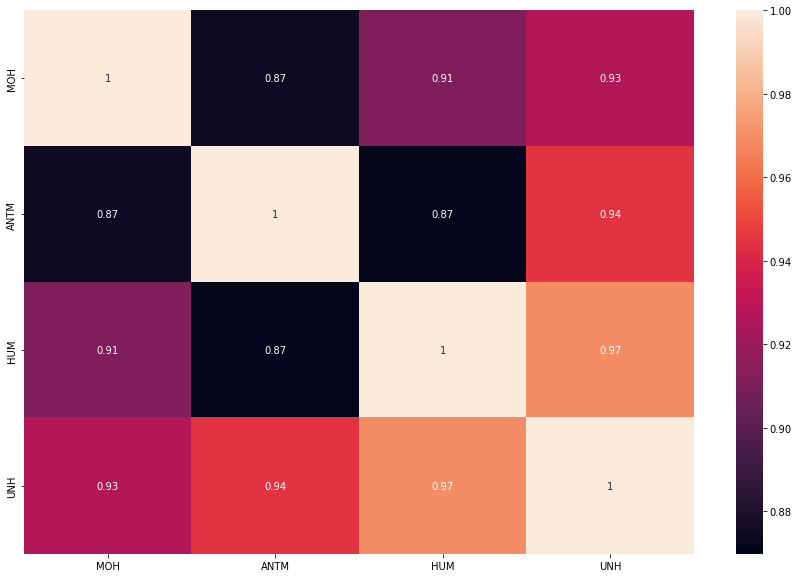

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)
data.corr().to_csv('4x4CorrelationMatrix.csv', index=False)

In [ ]:
data['t'] = range(1, len(data) + 1)
data.set_index('t',inplace=True)
data.to_csv('OriginalDataset.csv')
data

,Date,MOH,ANTM,HUM,UNH
t,,,,,
1,1/19/16,54.020000,136.850006,164.000000,112.580002
2,1/20/16,55.279999,137.490005,164.740005,114.790001
3,1/21/16,55.419998,138.779999,166.110001,113.500000
4,1/22/16,56.299999,141.399994,166.220001,114.330002
5,1/25/16,54.509998,138.669998,163.289993,113.379997
...,...,...,...,...,...
1272,2/4/21,206.649994,294.359985,385.089996,329.320007
1273,2/5/21,204.699997,290.850006,379.299988,324.510010
1274,2/8/21,202.539993,287.700012,378.339996,324.339996


In [ ]:
data0 = pd.DataFrame(columns=['Date','t','MOH(t)','ANTM(t)','HUM(t)','UNH(t)'])
data0['Date'] = data['Date'][3:1275]
data0['t'] = range(1, len(data0) + 1)
data0['MOH(t)'] = data['MOH'].iloc[3:1275]
data0['ANTM(t)'] = data['ANTM'].iloc[3:1275]
data0['HUM(t)'] = data['HUM'].iloc[3:1275]
data0['UNH(t)'] = data['UNH'].iloc[3:1275]
data0

,Date,t,MOH(t),ANTM(t),HUM(t),UNH(t)
t,,,,,,
4,1/22/16,1,56.299999,141.399994,166.220001,114.330002
5,1/25/16,2,54.509998,138.669998,163.289993,113.379997
6,1/26/16,3,55.700001,137.759995,164.660004,113.959999
7,1/27/16,4,54.389999,131.229996,161.300003,112.330002
8,1/28/16,5,53.660000,126.419998,159.789993,111.379997
...,...,...,...,...,...,...
1271,2/3/21,1268,210.899994,298.359985,379.929993,337.890015
1272,2/4/21,1269,206.649994,294.359985,385.089996,329.320007
1273,2/5/21,1270,204.699997,290.850006,379.299988,324.510010


In [ ]:
data1 = pd.DataFrame(columns=['t','MOH(t-1)','ANTM(t-1)','HUM(t-1)','UNH(t-1)'])
data1['MOH(t-1)'] = data['MOH'].iloc[2:1274]
data1['ANTM(t-1)'] = data['ANTM'].iloc[2:1274]
data1['HUM(t-1)'] = data['HUM'].iloc[2:1274]
data1['UNH(t-1)'] = data['UNH'].iloc[2:1274]
data1['t'] = range(1, len(data1) + 1)
data1

,t,MOH(t-1),ANTM(t-1),HUM(t-1),UNH(t-1)
t,,,,,
3,1,55.419998,138.779999,166.110001,113.500000
4,2,56.299999,141.399994,166.220001,114.330002
5,3,54.509998,138.669998,163.289993,113.379997
6,4,55.700001,137.759995,164.660004,113.959999
7,5,54.389999,131.229996,161.300003,112.330002
...,...,...,...,...,...
1270,1268,212.059998,298.989990,376.989990,338.720001
1271,1269,210.899994,298.359985,379.929993,337.890015
1272,1270,206.649994,294.359985,385.089996,329.320007


In [ ]:
data2 = pd.DataFrame(columns=['t','MOH(t-2)','ANTM(t-2)','HUM(t-2)','UNH(t-2)'])
data2['MOH(t-2)'] = data['MOH'].iloc[1:1273]
data2['ANTM(t-2)'] = data['ANTM'].iloc[1:1273]
data2['HUM(t-2)'] = data['HUM'].iloc[1:1273]
data2['UNH(t-2)'] = data['UNH'].iloc[1:1273]
data2['t'] = range(1, len(data2) + 1)
data2

,t,MOH(t-2),ANTM(t-2),HUM(t-2),UNH(t-2)
t,,,,,
2,1,55.279999,137.490005,164.740005,114.790001
3,2,55.419998,138.779999,166.110001,113.500000
4,3,56.299999,141.399994,166.220001,114.330002
5,4,54.509998,138.669998,163.289993,113.379997
6,5,55.700001,137.759995,164.660004,113.959999
...,...,...,...,...,...
1269,1268,214.110001,292.559998,379.899994,334.000000
1270,1269,212.059998,298.989990,376.989990,338.720001
1271,1270,210.899994,298.359985,379.929993,337.890015


In [ ]:
data3 = pd.DataFrame(columns=['t','MOH(t-3)','ANTM(t-3)','HUM(t-3)','UNH(t-3)'])
data3['MOH(t-3)'] = data['MOH'].iloc[0:1272]
data3['ANTM(t-3)'] = data['ANTM'].iloc[0:1272]
data3['HUM(t-3)'] = data['HUM'].iloc[0:1272]
data3['UNH(t-3)'] = data['UNH'].iloc[0:1272]
data3['t'] = range(1, len(data3) + 1)
data3

,t,MOH(t-3),ANTM(t-3),HUM(t-3),UNH(t-3)
t,,,,,
1,1,54.020000,136.850006,164.000000,112.580002
2,2,55.279999,137.490005,164.740005,114.790001
3,3,55.419998,138.779999,166.110001,113.500000
4,4,56.299999,141.399994,166.220001,114.330002
5,5,54.509998,138.669998,163.289993,113.379997
...,...,...,...,...,...
1268,1268,213.610001,296.980011,383.109985,333.579987
1269,1269,214.110001,292.559998,379.899994,334.000000
1270,1270,212.059998,298.989990,376.989990,338.720001


In [ ]:
data4 = pd.DataFrame(columns=['t','Y(t)'])
data4['Y(t)'] = data['UNH'].iloc[4:1276]
data4['t'] = range(1, len(data4) + 1)
data4   

,t,Y(t)
t,,
5,1,113.379997
6,2,113.959999
7,3,112.330002
8,4,111.379997
9,5,115.160004
...,...,...
1272,1268,329.320007
1273,1269,324.510010
1274,1270,324.339996


In [ ]:
data0.set_index('t',inplace=True)
data1.set_index('t',inplace=True)
data2.set_index('t',inplace=True)
data3.set_index('t',inplace=True)
data4.set_index('t',inplace=True)
dataf = pd.concat([data0,data1,data2,data3,data4],axis=1,sort=False).reset_index()
dataf.rename(columns = {'index':'t'})
dataf.to_csv('FinalDataset.csv', index=False)
dataf

,t,Date,MOH(t),ANTM(t),HUM(t),UNH(t),MOH(t-1),ANTM(t-1),HUM(t-1),UNH(t-1),MOH(t-2),ANTM(t-2),HUM(t-2),UNH(t-2),MOH(t-3),ANTM(t-3),HUM(t-3),UNH(t-3),Y(t)
0,1,1/22/16,56.299999,141.399994,166.220001,114.330002,55.419998,138.779999,166.110001,113.500000,55.279999,137.490005,164.740005,114.790001,54.020000,136.850006,164.000000,112.580002,113.379997
1,2,1/25/16,54.509998,138.669998,163.289993,113.379997,56.299999,141.399994,166.220001,114.330002,55.419998,138.779999,166.110001,113.500000,55.279999,137.490005,164.740005,114.790001,113.959999
2,3,1/26/16,55.700001,137.759995,164.660004,113.959999,54.509998,138.669998,163.289993,113.379997,56.299999,141.399994,166.220001,114.330002,55.419998,138.779999,166.110001,113.500000,112.330002
3,4,1/27/16,54.389999,131.229996,161.300003,112.330002,55.700001,137.759995,164.660004,113.959999,54.509998,138.669998,163.289993,113.379997,56.299999,141.399994,166.220001,114.330002,111.379997
4,5,1/28/16,53.660000,126.419998,159.789993,111.379997,54.389999,131.229996,161.300003,112.330002,55.700001,137.759995,164.660004,113.959999,54.509998,138.669998,163.289993,113.379997,115.160004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,1268,2/3/21,210.899994,298.359985,379.929993,337.890015,212.059998,298.989990,376.989990,338.720001,214.110001,292.559998,379.899994,334.000000,213.610001,296.980011,383.109985,333.579987,329.320007
1268,1269,2/4/21,206.649994,294.359985,385.089996,329.320007,210.899994,298.359985,379.929993,337.890015,212.059998,298.989990,376.989990,338.720001,214.110001,292.559998,379.899994,334.000000,324.510010
1269,1270,2/5/21,204.699997,290.850006,379.299988,324.510010,206.649994,294.359985,385.089996,329.320007,210.899994,298.359985,379.929993,337.890015,212.059998,298.989990,376.989990,338.720001,324.339996
1270,1271,2/8/21,202.539993,287.700012,378.339996,324.339996,204.699997,290.850006,379.299988,324.510010,206.649994,294.359985,385.089996,329.320007,210.899994,298.359985,379.929993,337.890015,329.630005


In [ ]:
datafcor = dataf.drop(['t'], axis=1)
datafcor.corr().to_csv('16x16CorrelationMatrix.csv', index=False)
datafcor.corr()

,MOH(t),ANTM(t),HUM(t),UNH(t),MOH(t-1),ANTM(t-1),HUM(t-1),UNH(t-1),MOH(t-2),ANTM(t-2),HUM(t-2),UNH(t-2),MOH(t-3),ANTM(t-3),HUM(t-3),UNH(t-3),Y(t)
MOH(t),1.000000,0.873663,0.911445,0.926934,0.997871,0.871649,0.910588,0.925635,0.995549,0.869949,0.909903,0.924465,0.992911,0.867593,0.908664,0.922766,0.925251
ANTM(t),0.873663,1.000000,0.868896,0.944089,0.872363,0.996513,0.867784,0.942655,0.871142,0.993712,0.867076,0.941676,0.869271,0.990046,0.865478,0.939748,0.940445
HUM(t),0.911445,0.868896,1.000000,0.969217,0.909052,0.864955,0.996867,0.966487,0.906551,0.861406,0.994018,0.963983,0.903550,0.857054,0.990421,0.960577,0.967455
UNH(t),0.926934,0.944089,0.969217,1.000000,0.924984,0.940535,0.967468,0.997374,0.923162,0.937614,0.966031,0.995357,0.920855,0.933938,0.963855,0.992494,0.997372
MOH(t-1),0.997871,0.872363,0.909052,0.924984,1.000000,0.873758,0.911421,0.926681,0.997869,0.871882,0.910590,0.925424,0.995540,0.870136,0.909894,0.924235,0.923434
ANTM(t-1),0.871649,0.996513,0.864955,0.940535,0.873758,1.000000,0.868974,0.944156,0.872431,0.996528,0.867864,0.942705,0.871238,0.993723,0.867157,0.941721,0.937417
HUM(t-1),0.910588,0.867784,0.996867,0.967468,0.911421,0.868974,1.000000,0.969216,0.909007,0.865102,0.996869,0.966481,0.906528,0.861536,0.994021,0.963972,0.965996
UNH(t-1),0.925635,0.942655,0.966487,0.997374,0.926681,0.944156,0.969216,1.000000,0.924724,0.940701,0.967487,0.997378,0.922922,0.937756,0.966049,0.995363,0.995347
MOH(t-2),0.995549,0.871142,0.906551,0.923162,0.997869,0.872431,0.909007,0.924724,1.000000,0.873957,0.911403,0.926460,0.997865,0.872037,0.910562,0.925185,0.921110
ANTM(t-2),0.869949,0.993712,0.861406,0.937614,0.871882,0.996528,0.865102,0.940701,0.873957,1.000000,0.869112,0.944288,0.872665,0.996532,0.868006,0.942835,0.933767


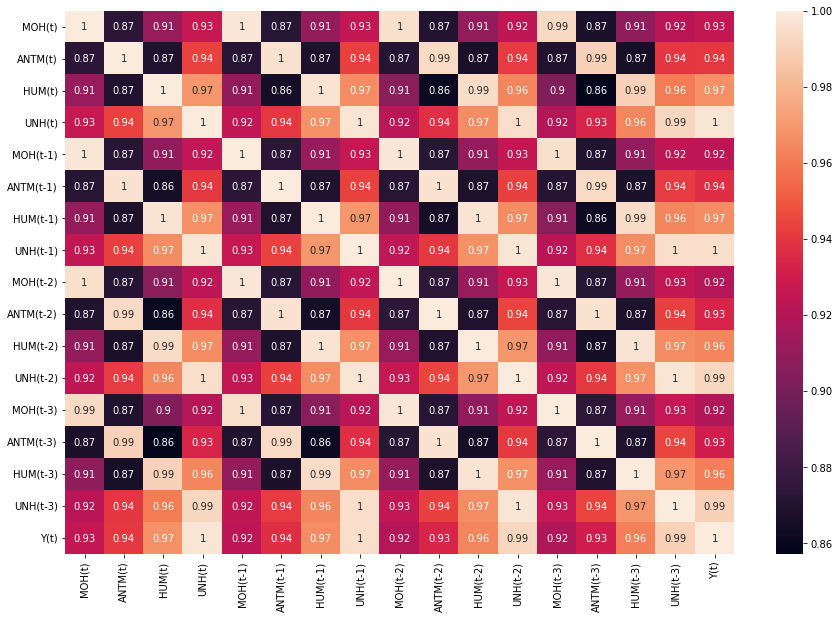

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(datafcor.corr(), annot=True)

In [ ]:
dataf
X = dataf.drop(['t', 'Date', 'Y(t)'], axis=1)
X = df.to_numpy(X)
Y = dataf['Y(t)']
Y = df.to_numpy(Y)
Y = Y.reshape((-1,1))
print(Y.shape)
print(Y)
#X

(1272, 1)
[[113.379997]
 [113.959999]
 [112.330002]
 ...
 [324.339996]
 [329.630005]
 [333.399994]]


In [ ]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y, test_size=0.2, random_state= 0)

In [ ]:
print(Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape)

(1017, 16) (255, 16) (1017, 1) (255, 1)


In [ ]:
scaler = StandardScaler()
## Fit on training set only.
scaler.fit(Xtrain)
# Apply transform to both the training set and the test set.
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [ ]:
Xtrain

array([[ 0.18386068,  0.28412336, -0.0526449 , ...,  0.17201583,
        -0.1628018 , -0.07629937],
       [-1.12876117, -1.68785874, -1.52141884, ..., -1.62153886,
        -1.48399596, -1.81044892],
       [ 0.41248124,  1.08562586, -0.09607445, ...,  1.30990231,
         0.16633326,  0.30967249],
       ...,
       [ 2.08750167,  1.53825464,  1.84750435, ...,  1.72008015,
         2.05899452,  2.0651404 ],
       [-0.54852399, -0.11403408,  0.08269113, ..., -0.06617304,
         0.08630939, -0.06572058],
       [ 0.69621056,  0.83791227,  0.74117598, ...,  0.77949424,
         0.70071311,  0.66502986]])

In [ ]:
Ytrain

array([[243.669998],
       [110.019997],
       [236.699997],
       ...,
       [337.      ],
       [224.279999],
       [263.079987]])

In [ ]:
X_scaled = np.concatenate((Xtrain, Xtest))
mean_input = X_scaled.mean(axis=0) 
mean_input

array([0.00465115, 0.00757504, 0.00456344, 0.00588981, 0.00409488,
       0.00549598, 0.00389758, 0.00375457, 0.00652456, 0.00866623,
       0.00705943, 0.00676516, 0.00683543, 0.010516  , 0.00881198,
       0.00813153])

In [ ]:
# Make an instance of the Model
pca = PCA(.95)
pca.fit(Xtrain)
#hmin
h95 = pca.n_components_
h95

2

In [ ]:
explained_var = []
for i in np.arange(1,4):
  pca = PCA(n_components=i)
  pca.fit(X) 
  explained_var.append(pca.explained_variance_ratio_.cumsum().round(2)) 
explained_var[2]

array([0.94, 0.98, 0.99])

In [ ]:
Xtrain.shape
#hmax = math.floor((len(Xtrain.row) - 1) / (len(Xtrain.columns) + 2))

(1017, 16)

In [ ]:
#hmax = math.floor((len(Xtrain.rows) - 1) / (len(Xtrain.columns) + 2)) or 18h + 1 <= 1017
hmax = math.floor((1017 - 1) / (16 + 2))
hmax

56

In [ ]:
################Test 8
#Build and Compile Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model8 = Sequential()

# Use my own hidden layer size
model8.add(Dense(56, activation='relu', input_shape=(16,)))
model8.add(Dense(1, activation='relu'))

print(model8.summary())

# tune the learning_rate
#model8.compile(optimizer=optimizers.Adam(learning_rate=0.01), loss=losses.MeanSquaredError())

optimizer = optimizers.Adam(learning_rate=0.01)
loss_fn = losses.MeanSquaredError()

model8.compile(optimizer=optimizer,loss=loss_fn)

#Prepare the training set
batch_size = 25

train_dataset = tf.data.Dataset.from_tensor_slices((Xtrain, Ytrain))
train_dataset.element_spec

train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)
train_dataset.element_spec

list(train_dataset.as_numpy_iterator())[0][1].shape

#train the model8 “manually”
batch_loss = []
gradsNorm = []
epoch_loss = []
val_loss = []
best_val_loss = model8.evaluate(Xtest,Ytest,verbose=0)
#tune `epochs` according to your data
epochs = 150

#best_val_loss

#Writing a training loop from scratch
import timeit
tic=timeit.default_timer()
for epoch in range(epochs):
  print("\nStart of epoch %d" % (epoch,))
  for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
    with tf.GradientTape() as tape:
      y_batch_pred = model8(x_batch_train, training=True)
      loss_value = loss_fn(y_batch_train,y_batch_pred)
    grads = tape.gradient(loss_value, model8.trainable_weights)
    gradsNorm.append(   np.sqrt( sum( [ np.sum( np.square(g.numpy()))  for g in grads ] ) )  )
    batch_loss.append(loss_value.numpy())
    optimizer.apply_gradients( zip( grads,model8.trainable_weights ) )
  epoch_loss_value = model8.evaluate(Xtrain,Ytrain,verbose=0)
  epoch_loss.append(epoch_loss_value)

  val_loss_value = model8.evaluate(Xtest,Ytest,verbose=0)
  val_loss.append(val_loss_value)
  print("epoch_loss: %.4f - val_loss:%.4f" %  (float(epoch_loss_value), float(val_loss_value) )    )

  if val_loss_value < best_val_loss:
    best_val_loss=val_loss_value
    model8.save('bestModel8')

toc=timeit.default_timer()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 56)                952       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 57        
Total params: 1,009
Trainable params: 1,009
Non-trainable params: 0
_________________________________________________________________
None

Start of epoch 0
epoch_loss: 30841.5176 - val_loss:32127.2090
INFO:tensorflow:Assets written to: bestModel8/assets

Start of epoch 1
epoch_loss: 12047.7988 - val_loss:13072.6650
INFO:tensorflow:Assets written to: bestModel8/assets

Start of epoch 2
epoch_loss: 8910.5996 - val_loss:9988.3486
INFO:tensorflow:Assets written to: bestModel8/assets

Start of epoch 3
epoch_loss: 4646.3345 - val_loss:5552.4697
INFO:tensorflow:Assets written to: bestModel8/assets

Start of epoch 4
epoch_loss: 2150.1592 - val_loss:

In [ ]:
print(toc - tic) #elapsed time in seconds

84.32610103299976


In [ ]:
print(best_val_loss)

30.33315086364746


In [ ]:
#Best Model
bestModel8 = tf.keras.models.load_model('bestModel8')
print("\n Model8 val_loss")
model8.evaluate(Xtest,Ytest)
print("\n bestModel8 val_loss")
bestModel8.evaluate(Xtest,Ytest)


 Model8 val_loss
8/8 [==============================] - 0s 2ms/step - loss: 39.9228

 bestModel8 val_loss
8/8 [==============================] - 0s 2ms/step - loss: 30.3332


30.33315086364746

In [ ]:
print(math.floor(math.sqrt(len(gradsNorm))))
gradsNorm = [x/ math.floor(math.sqrt(len(gradsNorm))) for x in gradsNorm] 
print(gradsNorm)

78
[8.992924238660205, 18.427371812822575, 17.796132304578276, 23.99139417205919, 25.184992204423395, 32.11857675004023, 24.25978931798714, 23.647249341774085, 31.319181333182275, 30.386296508994718, 26.661618786128574, 29.427743846333808, 44.194748577129545, 36.61259198061896, 44.45507430486814, 51.491235443703445, 34.63082104397373, 53.66636254806514, 62.05654642901702, 44.10492013496645, 58.17286949440308, 48.02022805605867, 60.381626643433535, 75.88564879316574, 70.59373296953699, 77.34234688242418, 48.200905412933494, 74.02373906652883, 93.84805306790734, 60.34270367674315, 72.23024001858687, 81.10943451065296, 107.02022182023207, 79.21857386201852, 68.51745415493848, 72.96656650563757, 66.80121517522285, 80.16295983456368, 78.27378711616618, 98.91953855205375, 63.814800482587074, 88.82451847540875, 73.39726545859732, 77.12519525876577, 81.48407190711833, 59.46770135604214, 66.93342182415537, 63.21428059506643, 87.13256457683663, 81.57705065010607, 60.13275197031944, 85.2218207649

In [ ]:
gradsNorm[0:10]

[8.992924238660205,
 18.427371812822575,
 17.796132304578276,
 23.99139417205919,
 25.184992204423395,
 32.11857675004023,
 24.25978931798714,
 23.647249341774085,
 31.319181333182275,
 30.386296508994718]

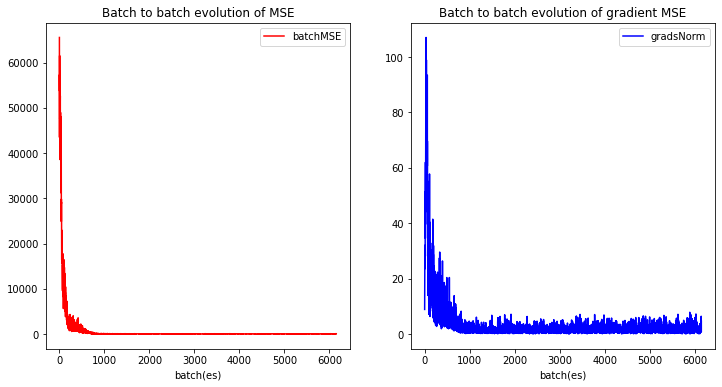

<Figure size 432x288 with 0 Axes>

In [ ]:
#create batch MSE, batch gradNorms
batch_df8 = pd.DataFrame(list(zip(gradsNorm, batch_loss)), columns = ["gradsNorm", "batchMSE"])
batch_df8.index.name = "Batch No."
batch_df8.head(10)

#plot
plt.subplot(1,2,1)
batch_df8['batchMSE'].plot(label = "batchMSE", color = "r", figsize = (12,6))
plt.title ("Batch to batch evolution of MSE")
plt.xlabel("batch(es)")

plt.legend()

plt.subplot(1,2,2)
batch_df8['gradsNorm'].plot(label = "gradsNorm", color = "b", figsize = (12,6))
plt.title ("Batch to batch evolution of gradient MSE")
plt.xlabel("batch(es)")
plt.legend()

plt.show()
plt.tight_layout()

In [ ]:
val_loss

[32127.208984375,
 13072.6650390625,
 9988.3486328125,
 5552.4697265625,
 2880.360107421875,
 2402.19287109375,
 2212.345947265625,
 1961.44921875,
 1737.843994140625,
 1521.963134765625,
 1312.7359619140625,
 1071.2159423828125,
 858.3657836914062,
 641.0244750976562,
 460.8330993652344,
 346.8006591796875,
 225.033935546875,
 156.78036499023438,
 93.9992446899414,
 74.80583953857422,
 54.18921661376953,
 50.06183624267578,
 43.88695526123047,
 43.37193298339844,
 41.087703704833984,
 39.901512145996094,
 38.02073287963867,
 39.05414962768555,
 37.4764289855957,
 35.53072738647461,
 34.86360549926758,
 35.90421676635742,
 34.86681365966797,
 34.61276626586914,
 32.86775588989258,
 36.21710968017578,
 32.62127685546875,
 33.95064163208008,
 37.175479888916016,
 36.47109603881836,
 42.561805725097656,
 31.56836700439453,
 31.601526260375977,
 35.119712829589844,
 33.63920211791992,
 32.76483154296875,
 32.765621185302734,
 34.33729934692383,
 31.388795852661133,
 32.10634231567383,
 31.

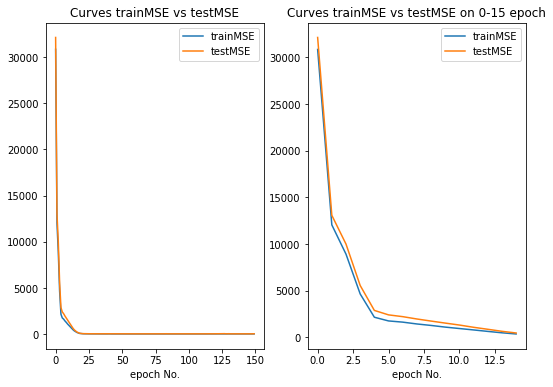

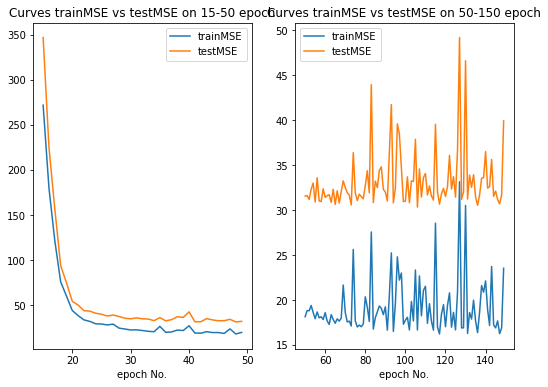

In [ ]:
#create epoch train and test MSE
epoch_df8 = pd.DataFrame(list(zip(epoch_loss, val_loss)), columns = ["trainMSE", "testMSE"])
epoch_df8.to_csv('TrainTestMSE56.csv', index=False)
epoch_df8.index.name = "epoch No."
#epoch_df8.head(10)

#plot
plt.subplot(1,4,1)
epoch_df8['trainMSE'].plot(label = "trainMSE", figsize = (18,6))
epoch_df8['testMSE'].plot(label = "testMSE")
plt.title ("Curves trainMSE vs testMSE")
plt.xlabel("epoch No.")
plt.legend()

plt.subplot(1,4,2)
epoch_df8['trainMSE'].iloc[0:15,].plot(label = "trainMSE", figsize = (18,6))
epoch_df8['testMSE'].iloc[0:15,].plot(label = "testMSE")
plt.title ("Curves trainMSE vs testMSE on 0-15 epoch")
plt.xlabel("epoch No.")
plt.legend()
plt.show() 

plt.subplot(1,4,3)
epoch_df8['trainMSE'].iloc[15:50,].plot(label = "trainMSE", figsize = (18,6))
epoch_df8['testMSE'].iloc[15:50,].plot(label = "testMSE")
plt.title ("Curves trainMSE vs testMSE on 15-50 epoch")
plt.xlabel("epoch No.")
plt.legend()

plt.subplot(1,4,4)
epoch_df8['trainMSE'].iloc[50:,].plot(label = "trainMSE", figsize = (18,6))
epoch_df8['testMSE'].iloc[50:,].plot(label = "testMSE")
plt.title ("Curves trainMSE vs testMSE on 50-150 epoch")
plt.xlabel("epoch No.")
plt.legend()

plt.show()
#plt.tight_layout()

In [ ]:
#access hidden layer activity
#use bestModel.layers[0] as a function.


bestModel8.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 56)                952       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 57        
Total params: 1,009
Trainable params: 1,009
Non-trainable params: 0
_________________________________________________________________


In [ ]:
bestModel8.layers[0]

In [ ]:
av_j = np.mean(bestModel8.layers[0](X).numpy(), axis = 0)

In [ ]:
bestModel8.layers[0](X).numpy().shape

(1272, 56)

In [ ]:
predd = bestModel8.predict(Xtest)
#Ytest
#predd

          UNH actualPrice$ UNH predictedPrice$
time                                          
1                  [302.5]         [294.81854]
2              [298.26001]         [299.66055]
3             [198.630005]         [196.89134]
4             [180.380005]         [182.02504]
5                 [188.25]         [186.04619]
...                    ...                 ...
251   [227.86000099999998]         [228.14423]
252           [315.549988]         [320.40094]
253           [132.029999]         [132.45026]
254   [212.50999500000003]         [212.67213]
255           [270.200012]         [269.72067]

[255 rows x 2 columns]
      UNH actualPrice$  UNH predictedPrice$
time                                       
1           302.500000           294.818542
2           298.260010           299.660553
3           198.630005           196.891342
4           180.380005           182.025040
5           188.250000           186.046188
...                ...                  ...
251         2

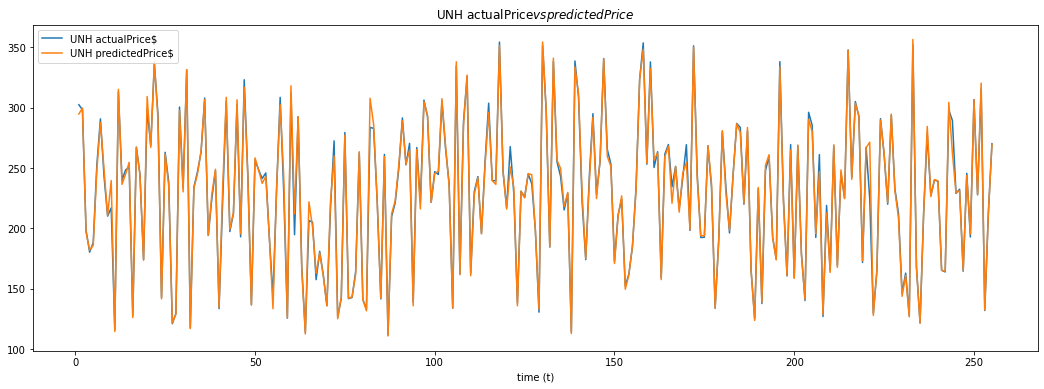

In [ ]:
#create epoch train and test MSE
Ytest_predd = pd.DataFrame(list(zip(Ytest, predd)), columns = ["UNH actualPrice$", "UNH predictedPrice$"])
Ytest_predd.index += 1 
Ytest_predd.index.name = "time"
print(Ytest_predd)
#Ytest_predd.head(10)

#plot
Ytest_predd=Ytest_predd.astype(float)
#Ytest_predd.to_csv('ActualPredictedPricet.csv', index=False)
print(Ytest_predd)
Ytest_predd['UNH actualPrice$'].plot(label = "UNH actualPrice$", figsize = (18,6))
Ytest_predd['UNH predictedPrice$'].plot(label = "UNH predictedPrice$")
plt.title ("UNH actualPrice$ vs predictedPrice$")
plt.xlabel("time (t)")
plt.legend()
plt.show()

In [ ]:
diff1 = ((Ytest_predd["UNH actualPrice$"] - Ytest_predd["UNH predictedPrice$"]).abs()/Ytest_predd["UNH actualPrice$"])*100
print(diff1.max())
print(diff1)
diff1.to_csv('ERRt.csv', index=False)
Ytest_predd['Percentage Error%'] = diff1
print(Ytest_predd)

20.616378223637838
time
1      2.539325
2      0.469571
3      0.875327
4      0.911983
5      1.170683
         ...   
251    0.124737
252    1.537301
253    0.318304
254    0.076297
255    0.177402
Length: 255, dtype: float64
      UNH actualPrice$  UNH predictedPrice$  Percentage Error%
time                                                          
1           302.500000           294.818542           2.539325
2           298.260010           299.660553           0.469571
3           198.630005           196.891342           0.875327
4           180.380005           182.025040           0.911983
5           188.250000           186.046188           1.170683
...                ...                  ...                ...
251         227.860001           228.144226           0.124737
252         315.549988           320.400940           1.537301
253         132.029999           132.450256           0.318304
254         212.509995           212.672134           0.076297
255         270.

In [ ]:
Ytest_predd.to_csv('ActualPredictedPricet.csv', index=False)
Ytest_predd.to_dict('index')

{1: {'Percentage Error%': 2.5393247998450414,
  'UNH actualPrice$': 302.5,
  'UNH predictedPrice$': 294.81854248046875},
 2: {'Percentage Error%': 0.469571156560882,
  'UNH actualPrice$': 298.26001,
  'UNH predictedPrice$': 299.6605529785156},
 3: {'Percentage Error%': 0.8753273891898024,
  'UNH actualPrice$': 198.630005,
  'UNH predictedPrice$': 196.89134216308594},
 4: {'Percentage Error%': 0.9119828291675406,
  'UNH actualPrice$': 180.380005,
  'UNH predictedPrice$': 182.02503967285156},
 5: {'Percentage Error%': 1.1706834770293824,
  'UNH actualPrice$': 188.25,
  'UNH predictedPrice$': 186.0461883544922},
 6: {'Percentage Error%': 1.6324872989262544,
  'UNH actualPrice$': 252.27999900000003,
  'UNH predictedPrice$': 248.16156005859375},
 7: {'Percentage Error%': 1.0147235032432795,
  'UNH actualPrice$': 290.790009,
  'UNH predictedPrice$': 287.83929443359375},
 8: {'Percentage Error%': 2.317751870557416,
  'UNH actualPrice$': 243.49000499999997,
  'UNH predictedPrice$': 249.1334991

In [ ]:
# Creating FastAPI instance
app = FastAPI()

# Creating class to define the request body and the type hints of each attribute
class request_body(BaseModel):
    name_stock : str

# Result fucntion to return results
def result():
    return Ytest_predd.to_dict('index')

# Defining path operation for root endpoint
@app.get('/')
def root():
    return {'message': 'Welcome to Healthcare Stock Analysis!'}
  
# Defining path operation for /action endpoint
@app.get('/{action}')
def root_action(action : str): 
    # Defining a function that takes only string as input and output the following message
    return {'message': f'From different Healthcare companies stock prices, {action} UNH stock prices'}

# Creating an Endpoint to receive the data to make prediction on
@app.post('/predict')
async def predict(data: request_body):

    # Return the Result
    return result()

# routes to get the result
@app.get("/predict/UNH")
async def display():
    return result()

ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)

Public URL: http://c147-35-221-27-238.ngrok.io


INFO:     Started server process [63]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [63]
